In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from utils import clustering
from utils import CommonFunctions as CF

import importlib
importlib.reload(clustering)

import networkx as nx
import igraph as ig

In [2]:
def create_graph_comms(N, num_groups, mean_deg, k_out):
    nodes_per_group = N//num_groups; kave = mean_deg; k_out = .2#k_out = .15#kave is local average
    k_in = kave - k_out
    p_in = k_in/nodes_per_group
    p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
    print('Block model probs: in %f - out %f' % (p_in, p_out))

    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

    while nx.is_connected(G_gn) == 0:
        print('The network should be in a single component. New trial!')
        G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

    infoG_gn = ['GN',k_out]

    print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))
    
    return G_gn

In [3]:
N = 128
num_groups = 4
mean_deg = 16
k_out = .2

G_gn = create_graph_comms(N, num_groups, mean_deg, k_out)
A_gn = nx.to_numpy_array(G_gn)

G_rand = nx.random_reference(G_gn, niter=3)
A_rand = nx.to_numpy_array(G_rand)

Block model probs: in 0.493750 - out 0.002083
Mean degree 15.578125


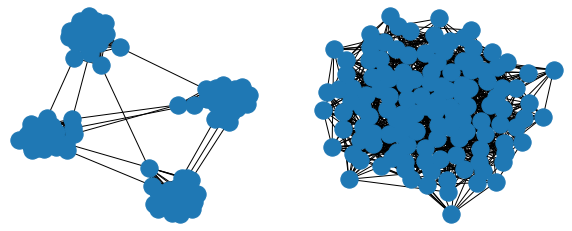

In [4]:
plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
nx.draw(G_gn, ax=ax)
ax = plt.subplot(1,2,2)
nx.draw(G_rand, ax=ax)

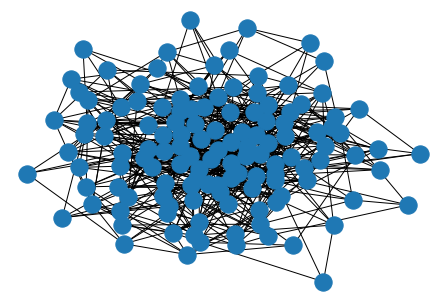

In [5]:
G_er = nx.fast_gnp_random_graph(N, p=0.076)
A_er = nx.to_numpy_array(G_er)
nx.draw(G_er)
plt.show()

In [6]:
G_fc = nx.fast_gnp_random_graph(N, p=1)
A_fc = nx.to_numpy_array(G_fc)

# Diffusion distance

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


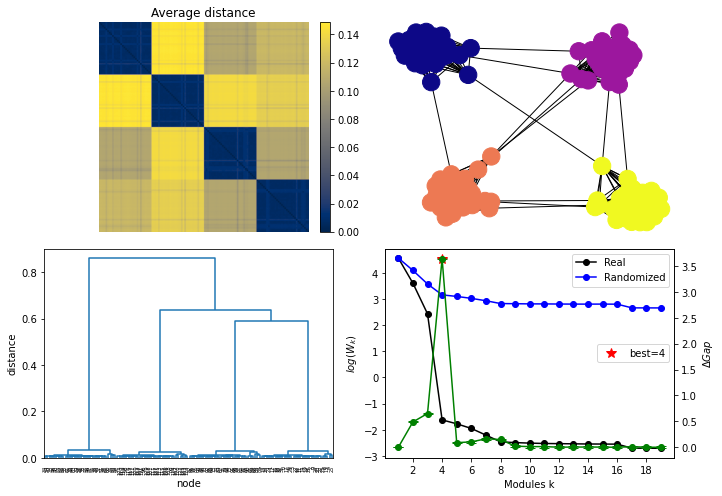

In [21]:
res_gn = clustering.clustering_diffusion_distance(A_gn, method='ward')

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


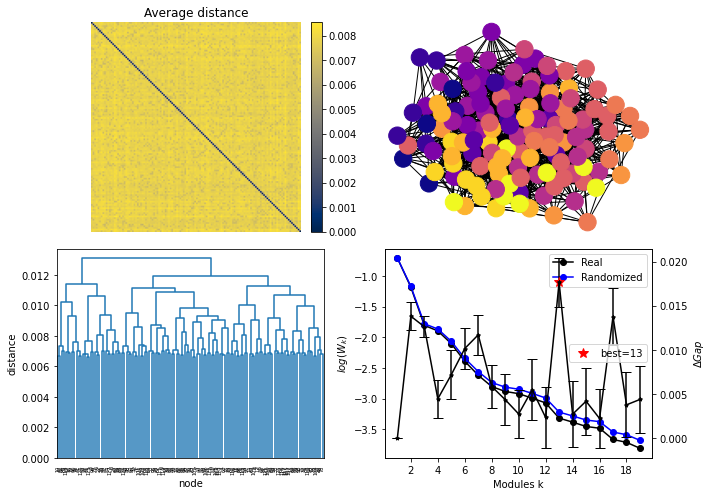

In [18]:
res_er = clustering.clustering_diffusion_distance(A_rand, method='ward')

Block model probs: in 0.246875 - out 0.003125
Mean degree 15.1875
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


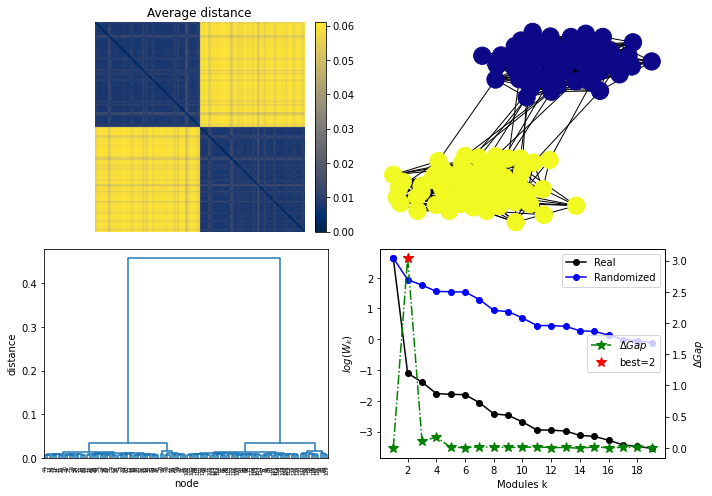

Block model probs: in 0.376190 - out 0.002381
Mean degree 14.793650793650794
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/126 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


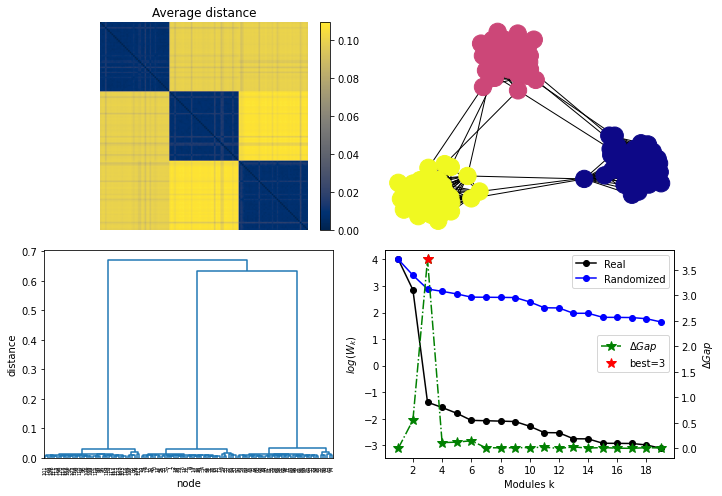

Block model probs: in 0.493750 - out 0.002083
Mean degree 15.59375
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


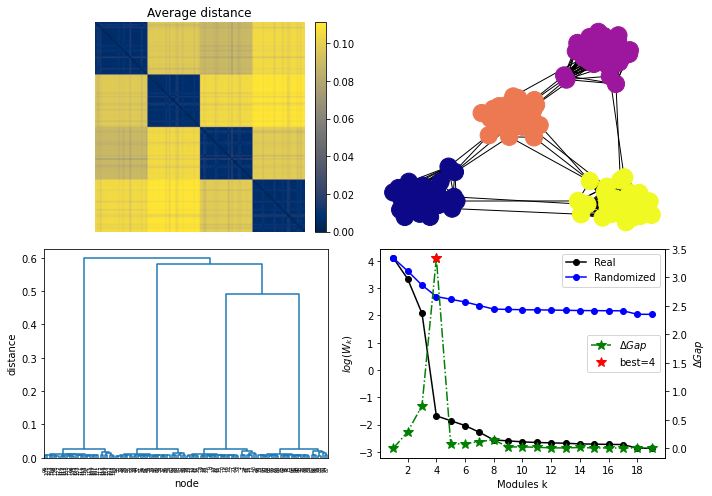

Block model probs: in 0.632000 - out 0.002000
Mean degree 14.688
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/125 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


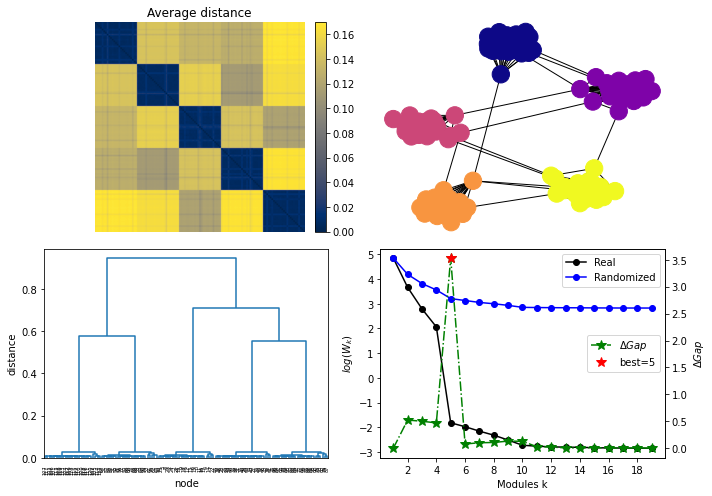

Block model probs: in 0.752381 - out 0.001905
The network should be in a single component. New trial!
Mean degree 15.222222222222221
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/126 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


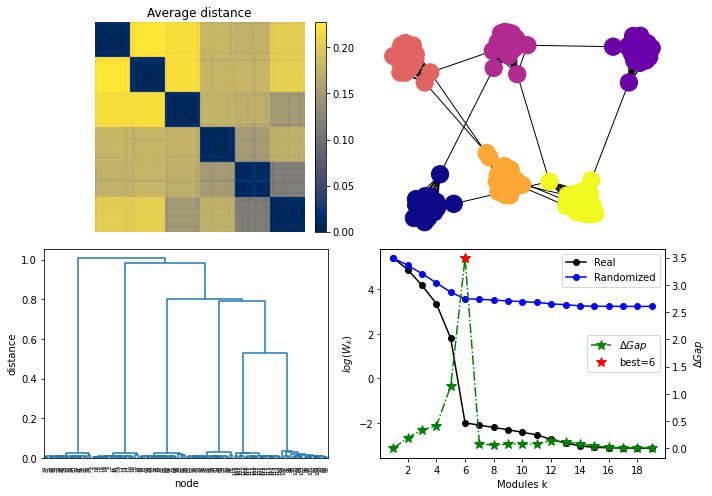

Block model probs: in 0.877778 - out 0.001852
Mean degree 15.19047619047619
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/126 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


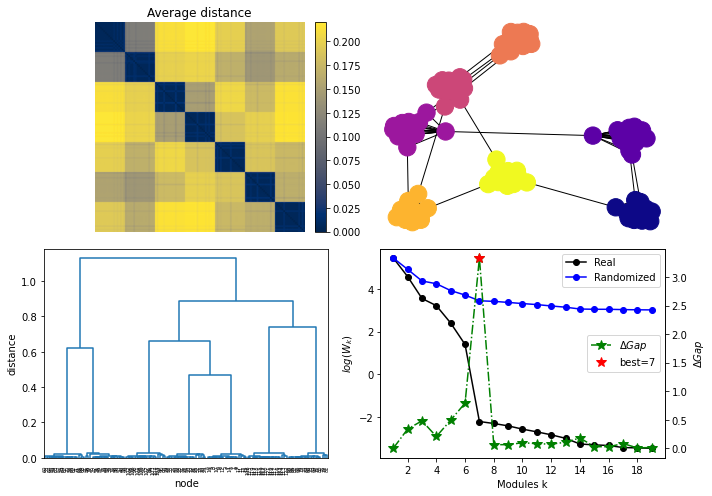

Block model probs: in 0.987500 - out 0.001786
Mean degree 14.9375
COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


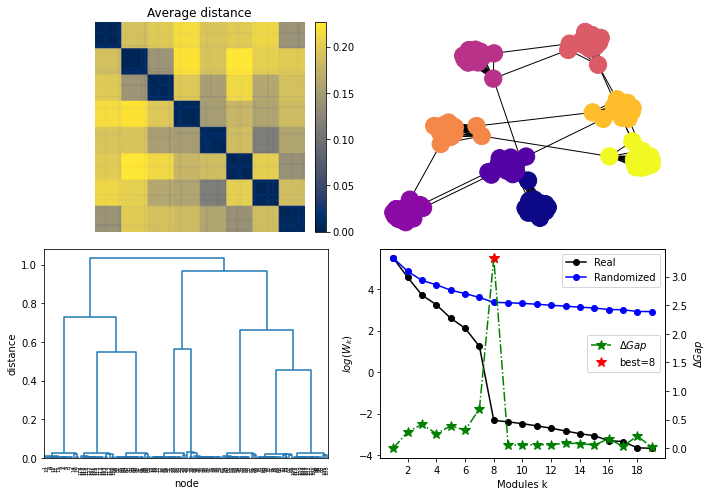

In [9]:
groups = [2, 3, 4, 5, 6, 7, 8]

for num_groups in groups:
    mat = create_graph_comms(N, num_groups, mean_deg, k_out)
    mat = nx.to_numpy_array(mat)
    
    clustering.clustering_diffusion_distance(mat, method='ward')

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


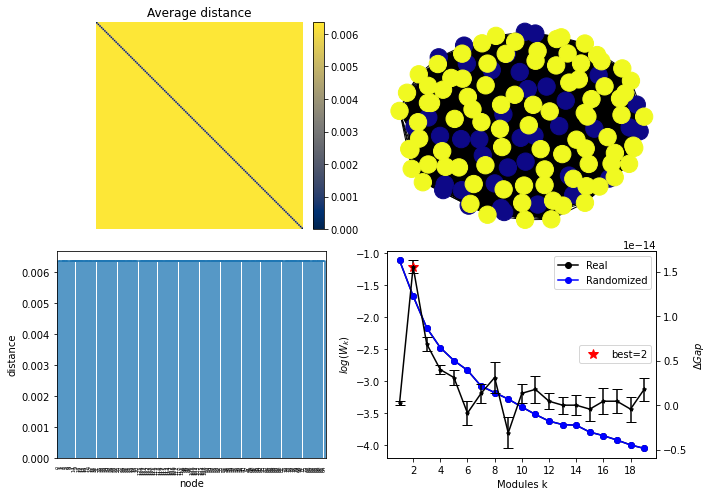

In [19]:
res_gn = clustering.clustering_diffusion_distance(A_fc, method='ward')

# Jacobian distance

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: NoisyVM


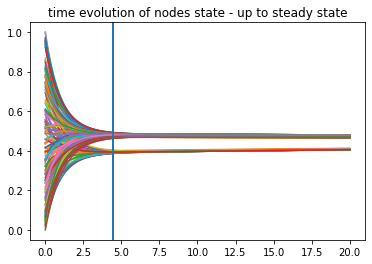

- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


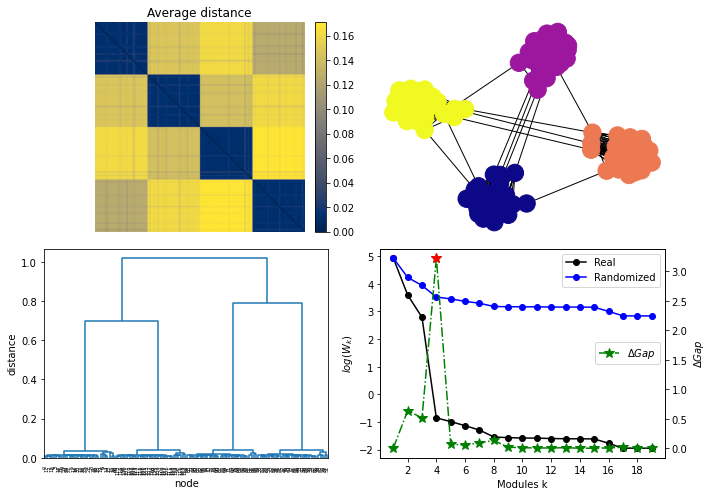

In [6]:
res_nvm = clustering.clustering_jacobian_distance(A_gn, 'NoisyVM', clust_max=20, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


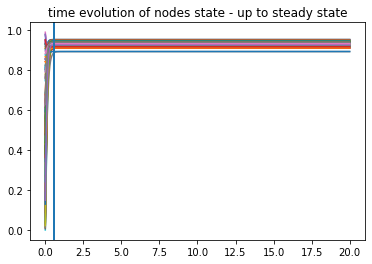

- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


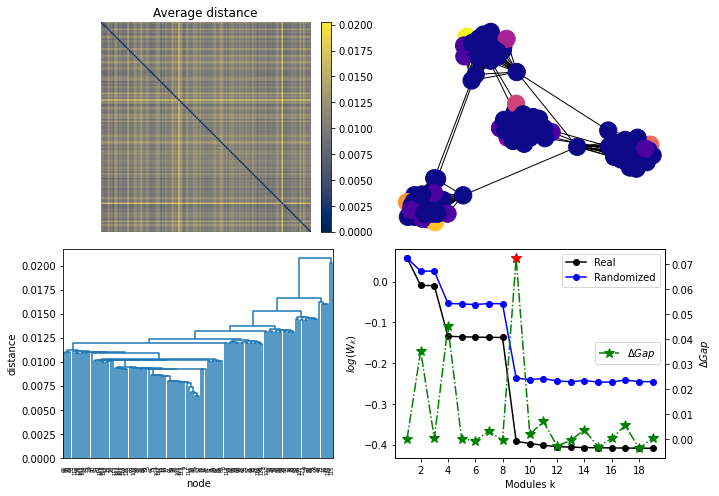

In [4]:
res = clustering.clustering_jacobian_distance(A_gn, 'Epidemics', clust_max=20, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Synchronization


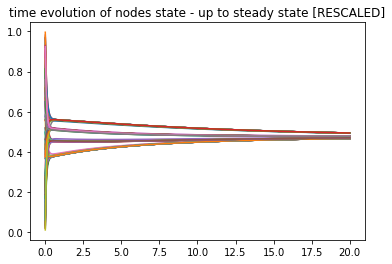

- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method complete...
- Compute gap statistics...


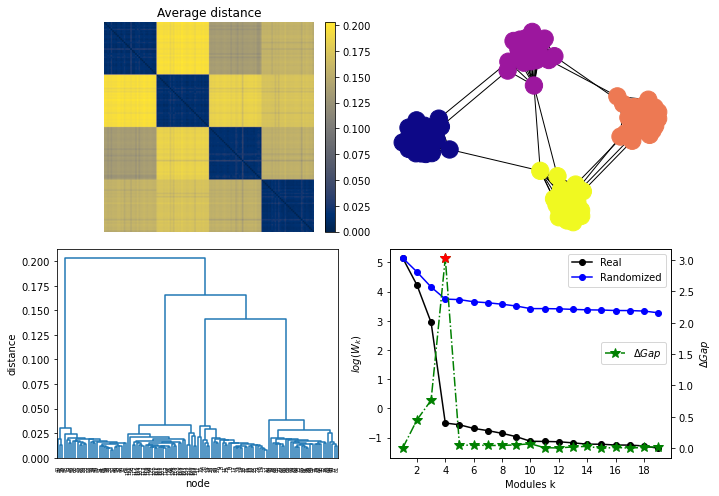

In [5]:
res = clustering.clustering_jacobian_distance(A_gn, 'Synchronization', clust_max=20, show=True, method='complete')